# Convolutional Neural Networks
MLP (multilayer perceptron) and CNN (convolutional neural network) are both popular deep learning models used in various machine learning tasks, including image recognition. However, when it comes to image recognition tasks, MLPs may not be the best option since they treat each pixel in the image as an independent feature, ignoring spatial relationships between neighboring pixels.

On the other hand, CNNs are specifically designed for image processing tasks. They use convolutional layers that can detect features in an image, such as edges, corners, and other shapes. The output from these layers is then passed to a fully connected layer for classification. The convolutional layers in CNNs allow them to automatically learn important features in the images, making them very effective in tasks such as object recognition, face recognition, and image segmentation.

One of the main reasons why CNNs perform better than MLPs in image recognition tasks is their ability to leverage the spatial structure of images. They can identify patterns and relationships between pixels in an image, whereas MLPs treat each pixel as an independent feature. Additionally, CNNs are also more computationally efficient than MLPs when working with high-dimensional data such as images.

Additionally, MLPs are sensitive to variations in image characteristics such as shifting, scaling, and distortion. But, CNNs are able to handle images with varying sizes and are robust to shifting, scaling, and distortion. This is achieved through the use of convolutional and pooling layers that can extract and recognize features regardless of their location within an image.

One reason why CNNs are particularly effective at image classification tasks is that they can learn local features and use them to build up more complex, global features. This allows them to better capture the spatial relationships within an image and recognize patterns even if they are shifted or distorted. Additionally, the convolutional and pooling layers in a CNN are designed to reduce the dimensionality of the learned features, which helps to prevent overfitting.

## Convolution

In signal processing and image analysis, convolution is a mathematical operation that combines two functions (or signals) to produce a third function that expresses how one is modified by the other. Convolution involves sliding one of the functions (known as the kernel or filter) over the other and calculating the integral of their point-wise product at each position. The resulting function is often referred to as the convolution of the two original functions.
Convolution operation can be written as follows where convolving two functions $f$ and $g$ over a continuous domain $s$, where $g$ is reflected and shifted by $t$ before being multiplied by $f$ and integrated over $t$.

$(f * g)(s) = \int_{-\infty}^{\infty} f(t)g(s-t)dt$

![](images/1-d%20conv.png)

In a discrete space, such as digital images, the convolution operation can be represented as a discrete summation instead of an integral. Note that the sum goes from negative infinity to positive infinity, but in practice, we can only compute the convolution for a finite range of values.

$(f * g)(s) = \sum_{_-\infty}^{\infty} f(t)g(s-t)$

#### Extra: Cross-Correlation
Cross-correlation is a mathematical operation that measures the similarity between two signals as a function of the displacement of one relative to the other. It is often used in signal processing to detect the presence of a known pattern in a signal.

Cross-correlation is similar to convolution by the fact that convolution can be seen as a cross-correlation between the input signal and a time-reversed and shifted version of the kernel. This can be expressed mathematically as:

$(f \star g)(s) = \int_{-\infty}^{\infty} f(t)g(t-s)dt$

## CNNs
In convolutional neural networks (CNNs), convolution layers are used to extract spatial features from input images. The convolution operation is applied to the input image using a set of learned filters (also called kernels), each of which produces a 2-dimensional activation map (or feature map) that represents a particular pattern or feature in the input. The output of a convolution layer is a set of these feature maps, which are then passed through an activation function to introduce nonlinearity. To have the better understanding, the formula of computation performed in a $L^{th}$ layer of a CNN model is written as follows. Here, $X^L_{m, n}$ represents the $(m, n)$ pixel of the output feature map of this layer. $o^{L-1}$ is the output of the previous layer and the layer has a single kernel with $f \times f$ size.  

$X^L_{m, n} = \sum_{i=0}^{f-1} \sum_{j=0}^{f-1} o_{m+i,n+j}^{L-1} \cdot w_{i,j}^L + b^L.$

![](images/2d%20conv.png)

Then activation function will element-wisely apply as following: 

$o_{m, n}^L = a(x_{m, n}^L)$

When dealing with input images that have multiple channels, an additional term is added to the convolution formula to account for the extra channels. During each convolution operation, values are calculated for each channel separately and then added together to produce the final output. In addition, it is possible to have multiple kernels, each of which can be used to perform a separate convolution operation. By applying multiple kernels, we can extract a variety of features from the input image.

![](images/2d%20conv%20mc.png)

## Backpropagation in CNNs
During the backward pass, we compute the gradient of the loss function with respect to the weights of each layer, starting from the output layer and moving backward through the network.
Let $Y \in \mathbb{R}^{H' \times W' \times N}$ be the output of the convolutional layer, and let $L$ be the loss function. The gradient of the loss with respect to the output of the convolutional layer can be written as:

$\frac{\partial L}{\partial Y_{i, j, k}}$

Using the chain rule, we can compute the gradient of the loss with respect to the weights of the convolutional layer as follows.

$\frac{\partial L}{\partial w_{p, q, r, k}} = \sum_{i=0}^{H-f} \sum_{j=0}^{W-f} \frac{\partial L}{\partial Y_{i, j, k}} \cdot \frac{\partial Y_{i, j, k}}{\partial w_{p, q, r, k}}$

where

$\frac{\partial Y_{i, j, k}}{\partial w_{p, q, r, k}} = X_{i+p-1, j+q-1, r}$

Similarly, we can compute the gradient of the loss with respect to the input of the convolutional layer. A detailed description of this process in CNNs is described in [here](https://www.jefkine.com/general/2016/09/05/backpropagation-in-convolutional-neural-networks/). after calculating the gradient of the loss function with respect to the weights, we can update the weights using an optimization algorithm such as stochastic gradient descent (SGD) or its variants.

$W_{i,j,k} = W_{i,j,k} - \alpha \frac{\partial L}{\partial W_{i,j,k}}$

where $W_{i,j,k}$ represents the weight at position $(i,j,k)$ in the kernel, $\alpha$ is the learning rate, and $\frac{\partial L}{\partial W_{i,j,k}}$ is the gradient of the loss function with respect to the weight.


### Padding
Padding in CNNs are used to preserve spatial dimensions of the input volume throughout the convolution operation. During convolution, if the kernel size is greater than 1, the output feature map size is smaller than the input size. For example, if the input volume has dimensions of 32x32x3 and the kernel size is 3x3, then the output feature map size will be 30x30. This decrease in size with each convolutional layer can lead to loss of important spatial information, particularly at the borders of the input volume.

Padding is the process of adding additional values (usually zeros) to the input volume along the borders, before applying the convolution operation. The added values act as a buffer and help preserve the size of the output feature map. Padding can be done in two ways:

Same padding: In this type of padding, the output feature map size is kept the same as the input volume size. The padding is added in such a way that the convolution operation covers all the pixels of the input volume. The amount of padding to be added is calculated as:

$P = \frac{F-1}{2}$

where $F$ is the size of the kernel.

Valid padding: In this type of padding, the output feature map size is smaller than the input volume size. No padding is added, and the convolution operation is only applied to those pixels where the kernel completely overlaps with the input volume.
Padding layers are often used in CNN architectures to ensure that spatial information is not lost during the convolution operation, particularly at the borders of the input volume.

![](images/zero-padding.png)

### Stride
Stride in convolutional layers refers to the step size used when sliding the kernel over the input image during the convolution operation. In traditional convolution, the stride is equal to 1, meaning that the kernel moves one pixel at a time horizontally and vertically across the input image. However, in some cases, we may want to reduce the resolution of the output feature map or extract features from larger regions of the input image.

To achieve this, we can increase the stride size to a value greater than 1. For example, if we set the stride to 2, the kernel will move two pixels at a time in both the horizontal and vertical directions. This reduces the resolution of the output feature map by a factor of 2 in each dimension, effectively down-sampling the image.

The general formula for the output size of a convolutional layer with a stride of s is given by:

$\left\lfloor\frac{N-F}{s} + 1\right\rfloor$

where N is the size of the input image, F is the size of the convolutional kernel, and s is the stride size.

Stride is a hyperparameter that can be tuned to control the behavior of the convolutional layer. A larger stride can be useful for reducing the dimensionality of the input or for quickly extracting low-level features from large images, while a smaller stride can be used to preserve more spatial information and extract more fine-grained features.

Following is a general formula of the spatial size of the output image after a convolutional layer using padding and stride.

$\left\lfloor \frac{N + 2P - F}{S} + 1 \right\rfloor$

![](images/stride.png)



## Pooling
In convolutional neural networks (CNNs), pooling layers are often used to downsample the feature maps produced by convolutional layers. Pooling helps to reduce the spatial dimensions of the feature maps, while retaining the most important features.

There are several types of pooling layers, but the most commonly used ones are max pooling and average pooling. In max pooling, the output of each pooling operation is the maximum value of a small rectangular region of the input feature map. In average pooling, the output is the average value of the region. Both types of pooling layers slide a window over the input feature map, and apply the pooling operation to each region of the map that is covered by the window.

Pooling layers can help to make the network more robust to small variations in the input, such as translations or distortions. They can also reduce the computational cost of the network, by reducing the number of parameters and computations required. However, pooling can also lead to loss of information, since it discards some of the spatial details of the feature maps.

![](images/max_pool.png)

## Implementation

Here with using PyTorch, we make 2 different CNN model, one simple and another more complex, for classifying images in CIFAR-10 dataset.
First we wirte some utility function for evaluation of the predictions of the model that we further use.

In [1]:
import torch
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Tuple

def plot_loss_curves(results, title):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(12, 4))
    plt.suptitle(title, fontsize=15)

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

def calculate_performance(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        device: torch.device,
        class_names: List[str],
        title: str) -> Tuple[float, float, float]:
    model.eval()

    y_pred = []
    y_true = []
    test_acc = 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            output = (torch.max(torch.exp(test_pred_logits), 1)[1]).data.cpu().numpy()
            y_pred.extend(output)

            labels = y.data.cpu().numpy()
            y_true.extend(labels)

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_acc = test_acc / len(dataloader)
    cf_matrix = confusion_matrix(y_true, y_pred, normalize='true')
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    df_cm = pd.DataFrame(cf_matrix, index=[i for i in class_names],
                         columns=[i for i in class_names])
    plt.figure(figsize=(12, 7))
    plt.title(title)
    sns.heatmap(df_cm, annot=True)
    plt.show()

    return test_acc, f1, precision, recall

Next, we import CIFAR-10 dataset and make train and test dataloaders from it.

In [2]:
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

NUM_WORKERS = os.cpu_count()


def create_dataloaders(
        transform: transforms.Compose,
        batch_size: int,
        num_workers: int = NUM_WORKERS
):
    train_data = datasets.CIFAR10(
        root="data",
        train=True,
        download=True,
        transform=transform,
        target_transform=None
    )
    class_names = train_data.classes

    train_data, val_data = torch.utils.data.random_split(
        train_data, (len(train_data.data) - 10000, 10000)
    )

    test_data = datasets.CIFAR10(
        root="data",
        train=False,
        download=True,
        transform=ToTensor()
    )

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )

    val_dataloader = DataLoader(
        val_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )

    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )

    print("class names: ", class_names)
    print("length train data: ", len(train_dataloader.dataset),
          "\nlength validation data: ", len(val_dataloader.dataset),
          "\nlength test data: ", len(test_dataloader.dataset))
    return train_dataloader, val_dataloader, test_dataloader, class_names


In [ ]:
from torch import nn

class SimpleCNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.name = "Shallow Model"
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=256*2*2, out_features=512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=512, out_features=1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=1024, out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.conv_block_4(x)
        x = self.classifier(x)
        return x


In [3]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple
import torch


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    model.train()

    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    model.eval()

    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
               }
    model.to(device)

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(
            f"Epoch: {epoch + 1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [4]:
NUM_WORKERS = os.cpu_count()
transformer = transforms.Compose([transforms.ToTensor()])
train_dataloader, val_dataloader, test_dataloader, class_names = create_dataloaders(transformer, 32, NUM_WORKERS)

100%|██████████| 170498071/170498071 [00:03<00:00, 45576696.18it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
class names:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
length train data:  40000 
length validation data:  10000 
length test data:  10000


Let's analyze a batch of data and visualize a sample in it.

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

Image size: torch.Size([3, 32, 32])
Label: 5, label size: torch.Size([])


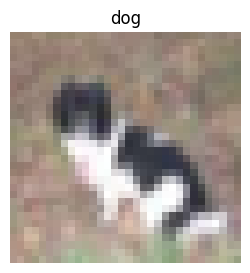

In [ ]:
import matplotlib.pyplot as plt

torch.manual_seed(2)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.figure(figsize=(3, 3))
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
simple_cnn = SimpleCNN(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=simple_cnn.parameters(), lr=0.001)

In [ ]:
results_simple_cnn = train(
    simple_cnn,
    train_dataloader,
    val_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.5641 | train_acc: 0.4495 | test_loss: 1.4296 | test_acc: 0.4893
Epoch: 2 | train_loss: 1.3143 | train_acc: 0.5340 | test_loss: 1.2841 | test_acc: 0.5465
Epoch: 3 | train_loss: 1.2106 | train_acc: 0.5765 | test_loss: 1.2421 | test_acc: 0.5662
Epoch: 4 | train_loss: 1.1470 | train_acc: 0.6001 | test_loss: 1.1802 | test_acc: 0.5855
Epoch: 5 | train_loss: 1.1036 | train_acc: 0.6167 | test_loss: 1.1812 | test_acc: 0.5875
Epoch: 6 | train_loss: 1.0669 | train_acc: 0.6301 | test_loss: 1.1575 | test_acc: 0.5984
Epoch: 7 | train_loss: 1.0386 | train_acc: 0.6401 | test_loss: 1.1529 | test_acc: 0.6004
Epoch: 8 | train_loss: 1.0039 | train_acc: 0.6526 | test_loss: 1.1349 | test_acc: 0.6055
Epoch: 9 | train_loss: 0.9684 | train_acc: 0.6645 | test_loss: 1.1155 | test_acc: 0.6156
Epoch: 10 | train_loss: 0.9421 | train_acc: 0.6765 | test_loss: 1.1075 | test_acc: 0.6186


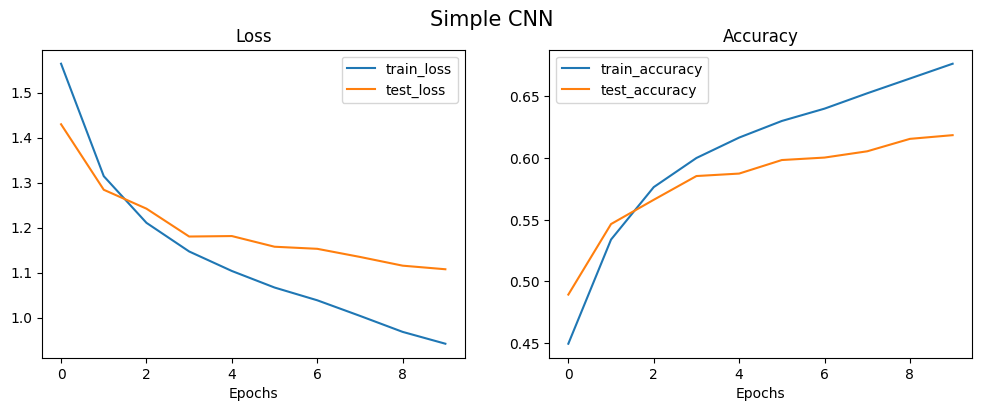

In [ ]:
plot_loss_curves(results_simple_cnn, title="Simple CNN")

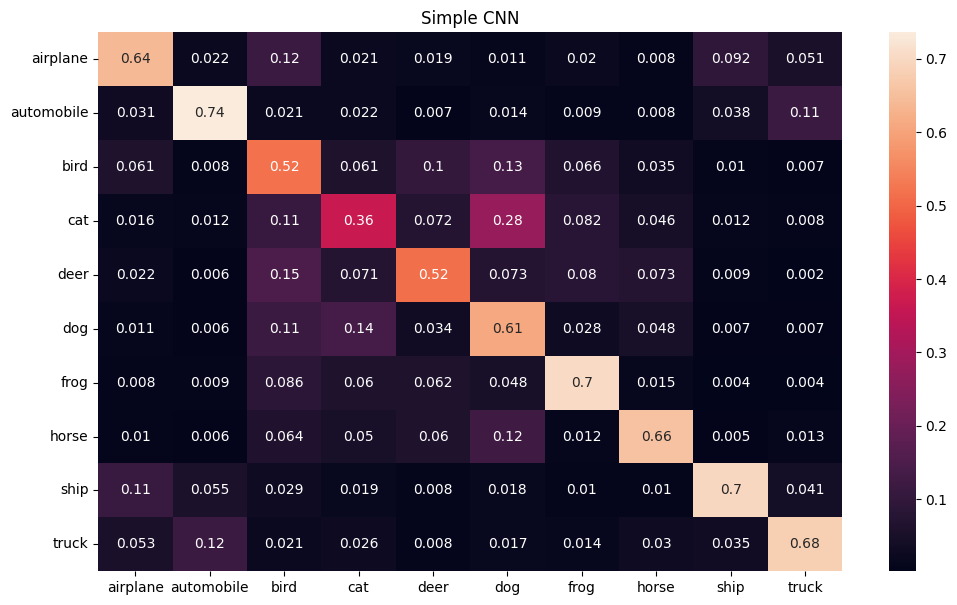

Accuracy = 0.6119209265175719, f1 score = 0.6143517885804557, precision = 0.6214408095614605, recall = 0.6122000000000001


In [ ]:
acc, f1, precision, recall = calculate_performance(simple_cnn, 
                                                  test_dataloader, 
                                                  device, 
                                                  class_names, 
                                                  "Simple CNN")
print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")

In [ ]:
torch.manual_seed(42)
custom_cnn = CustomCNN(
    input_shape=3,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=custom_cnn.parameters(), lr=0.001)

In [ ]:
results_custom_cnn = train(
    custom_cnn,
    train_dataloader,
    val_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6888 | train_acc: 0.4000 | test_loss: 1.3308 | test_acc: 0.5326
Epoch: 2 | train_loss: 1.2014 | train_acc: 0.5846 | test_loss: 1.2137 | test_acc: 0.5878
Epoch: 3 | train_loss: 1.0225 | train_acc: 0.6472 | test_loss: 0.9424 | test_acc: 0.6697
Epoch: 4 | train_loss: 0.8718 | train_acc: 0.7015 | test_loss: 0.7566 | test_acc: 0.7389
Epoch: 5 | train_loss: 0.7707 | train_acc: 0.7408 | test_loss: 0.6592 | test_acc: 0.7755
Epoch: 6 | train_loss: 0.7114 | train_acc: 0.7614 | test_loss: 0.6080 | test_acc: 0.7923
Epoch: 7 | train_loss: 0.6397 | train_acc: 0.7832 | test_loss: 0.5622 | test_acc: 0.8069
Epoch: 8 | train_loss: 0.5801 | train_acc: 0.8062 | test_loss: 0.5670 | test_acc: 0.8118
Epoch: 9 | train_loss: 0.5448 | train_acc: 0.8162 | test_loss: 0.5401 | test_acc: 0.8149
Epoch: 10 | train_loss: 0.4904 | train_acc: 0.8337 | test_loss: 0.4997 | test_acc: 0.8312


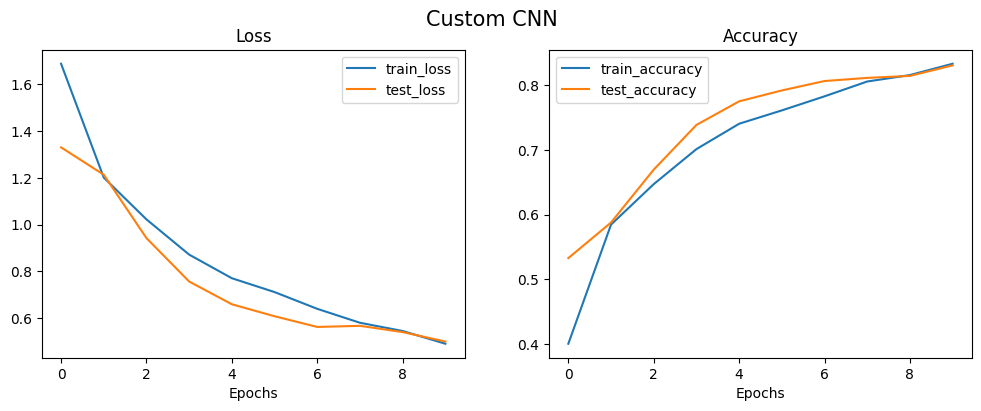

In [ ]:
plot_loss_curves(results_custom_cnn, title="Custom CNN")

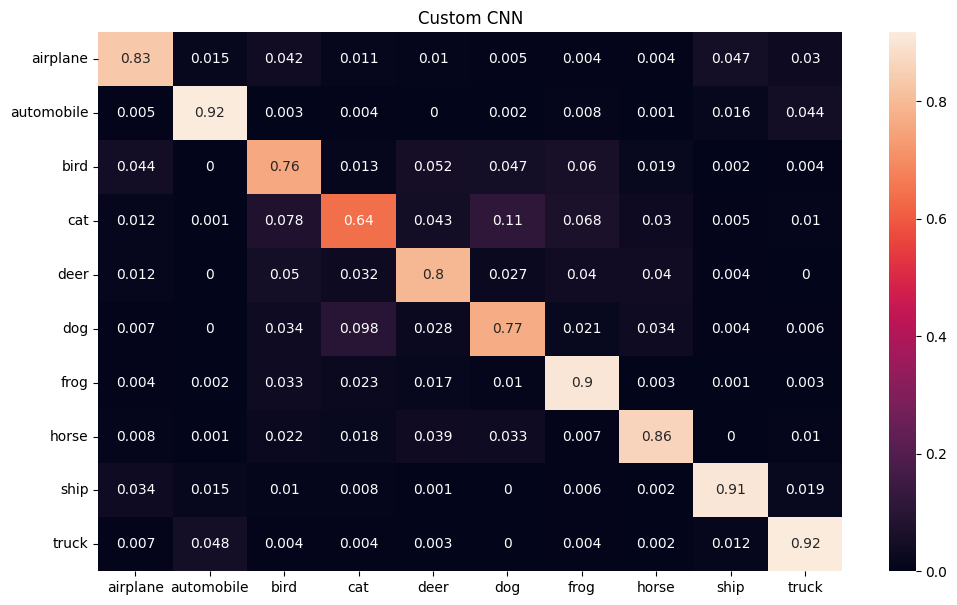

Accuracy = 0.8296725239616614, f1 score = 0.8286920300115277, precision = 0.8292329910343682, recall = 0.8298


In [ ]:
acc, f1, precision, recall = calculate_performance(custom_cnn, 
                                                  test_dataloader, 
                                                  device, 
                                                  class_names, 
                                                  "Custom CNN")
print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")

## Transfer Learning
Transfer learning is a technique that enables us to use a pre-trained model on a large dataset for a different task, often with a smaller dataset. This approach is particularly useful in deep learning, where training a model from scratch can require massive amounts of data and computational resources.

In the case of convolutional neural networks (CNNs), transfer learning involves leveraging a pre-trained model's learned weights and biases as a starting point for training on a new dataset. The pre-trained model is typically trained on a large dataset, such as ImageNet, and can already detect features like edges, corners, and textures that are useful for many computer vision tasks. By reusing the weights and biases of the pre-trained model, we can save time and resources in training a new model.

To use transfer learning with CNNs, we typically follow these steps:

1. Choose a pre-trained CNN model that was trained on a dataset similar to our target dataset. For example, if our target dataset is composed of different types of animals, we might choose a pre-trained model that was trained on a similar set of images.

2. Replace the last fully connected layer of the pre-trained model with a new layer that has the same number of output classes as our target dataset. The output of this layer will be used to classify the new images.

3. Freeze the weights and biases of all layers except for the new layer. By freezing the weights and biases of the pre-trained layers, we prevent them from being updated during training on the new dataset. This helps to preserve the previously learned features.

4. Train the new layer on our target dataset. Since the weights and biases of the pre-trained layers are fixed, we are only updating the weights and biases of the new layer.

5. Fine-tune the pre-trained layers. After training the new layer, we can unfreeze some or all of the pre-trained layers and continue training the model on the target dataset. This allows the model to adjust the previously learned features to better fit the new dataset.

Transfer learning is a powerful technique that can help us achieve state-of-the-art performance on a new dataset with limited resources. By leveraging pre-trained models, we can quickly build models that are specialized for our task and avoid the need to start from scratch.

There are several famous architectures for transfer learning in computer vision tasks. Some of them are:

1. VGG (Visual Geometry Group)
2. ResNet (Residual Network)
3. Inception-v3
4. MobileNet
5. DenseNet
6. EfficientNet
7. AlexNet
8. Vision Transformer (ViT)

These architectures have been pre-trained on large datasets such as ImageNet and can be fine-tuned for specific computer vision tasks.

Now, with using pre-trained ResNet-50 architecture on ImageNet dataset, we are trying to tackle the same issue using transfer learning approach. First we should download the pre-trained model from pytorch library and freeze the prarameters in the model.

In [39]:
import torchvision

weights = torchvision.models.ResNet50_Weights.DEFAULT
model_resnet = torchvision.models.resnet50(weights=weights).to(device)
for param in model_resnet.parameters():
    param.requires_grad = False

Next, we set a fully connected layer at the end of the model to specialized the model for our own specific task.

In [40]:
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

model_resnet.fc = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=2048, 
                    out_features=output_shape, 
                    bias=True)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.001)

Performing the corresponding preprocessing pipeline is essential before using transfer learning based on the model we use. Preprocessing ensures that the input data is in the correct format and that the model can effectively learn from the data. Different models may require different preprocessing steps based on their architecture and the type of data they were trained on. For instance, some models may expect the input data to be normalized or standardized, while others may require additional data augmentation techniques such as random cropping or flipping. Neglecting to perform the necessary preprocessing steps can result in the model failing to learn from the data effectively, or worse, completely failing to produce meaningful results. Therefore, it is crucial to carefully follow the recommended preprocessing pipeline for the model being used to ensure optimal performance. Each pre-trained model has a specific pre-processing steps which can be find in the pytorch documentation.

In [41]:
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [42]:
NUM_WORKERS = os.cpu_count()
train_dataloader, val_dataloader, test_dataloader, class_names = create_dataloaders(manual_transforms, 32, NUM_WORKERS)

Files already downloaded and verified
Files already downloaded and verified
class names:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
length train data:  40000 
length validation data:  10000 
length test data:  10000


In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
results_resnet = train(model=model_resnet,
                       train_dataloader=train_dataloader,
                       test_dataloader=val_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8764 | train_acc: 0.7182 | test_loss: 0.6147 | test_acc: 0.7973
Epoch: 2 | train_loss: 0.6644 | train_acc: 0.7746 | test_loss: 0.5648 | test_acc: 0.8086
Epoch: 3 | train_loss: 0.6249 | train_acc: 0.7873 | test_loss: 0.5434 | test_acc: 0.8135
Epoch: 4 | train_loss: 0.6038 | train_acc: 0.7939 | test_loss: 0.5366 | test_acc: 0.8164
Epoch: 5 | train_loss: 0.5940 | train_acc: 0.7976 | test_loss: 0.5399 | test_acc: 0.8148
Epoch: 6 | train_loss: 0.5870 | train_acc: 0.7997 | test_loss: 0.5304 | test_acc: 0.8146
Epoch: 7 | train_loss: 0.5781 | train_acc: 0.8022 | test_loss: 0.5459 | test_acc: 0.8158
Epoch: 8 | train_loss: 0.5790 | train_acc: 0.8000 | test_loss: 0.5220 | test_acc: 0.8228
Epoch: 9 | train_loss: 0.5713 | train_acc: 0.8027 | test_loss: 0.5251 | test_acc: 0.8169
Epoch: 10 | train_loss: 0.5781 | train_acc: 0.8001 | test_loss: 0.5256 | test_acc: 0.8186


As it can be seen, first epoch has a high value compared to the previous experiments. This is because of the pre-trained weights that can effectively extract the most important features in the image. By adding more layers in the `fc` layer or tunning the learning rate, we can achieve a better result.